In [243]:
#import libraries
import os
from pandas import read_csv
import pandas as pd
import numpy as np
import matplotlib as plt
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.utils import shuffle
from sklearn.metrics import plot_confusion_matrix, confusion_matrix

%matplotlib inline

import pandas_profiling


from scipy.stats import skew, norm
from scipy import stats
from scipy.special import boxcox1p
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures, RobustScaler
from sklearn import linear_model
from sklearn.linear_model import ElasticNetCV, ElasticNet, LinearRegression, Lasso, LassoCV, Ridge, RidgeCV, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, AdaBoostClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier, RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_squared_log_error, classification_report, accuracy_score
from math import sqrt

import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt



from lightgbm import LGBMRegressor
import lightgbm as lgb

np.random.seed(0)

In [244]:
#import data
current_path = os.getcwd()
current_path = os.path.dirname(current_path)
print(current_path)
#C:\Users\jonat\Desktop\capstone\nfl2\nfl_capstone\data_mart
dataset = current_path + '//data_mart//reporting_rb.csv'
cities = current_path + '//data_mart//facts_cities_metrics.csv'
college = current_path + '//data_mart//facts_college_metrics.csv'

dimc_file = current_path + '//data_mart//dimensions_cities.csv'
dimco_file = current_path + '//data_mart//dimensions_colleges.csv'
dimp_file = current_path + '//data_mart//dimensions_players.csv'




print(dataset)
city_dim = pd.read_csv(dimc_file)
college_dim = pd.read_csv(dimco_file)
player_dim = pd.read_csv(dimp_file)

dataset = pd.read_csv(dataset)
college_df = pd.read_csv(college)
city_df = pd.read_csv(cities)
dataset.head()

#https://stackoverflow.com/questions/9856683/using-pythons-os-path-how-do-i-go-up-one-directory

C:\Users\jonat\Desktop\capstone\nfl2\nfl_capstone
C:\Users\jonat\Desktop\capstone\nfl2\nfl_capstone//data_mart//reporting_rb.csv


,fms_id,espn_id,fms_college_id,fms_city_id,full_name,first_name,last_name,position,position_group,section,...,max_sep,max_oct,max_nov,max_dec,rushing_rush_td_pg_cf_scaled_zscore,rushing_rush_yds_pg_cf_scaled_zscore,rushing_scrim_plays_pg_cf_scaled_zscore,rushing_scrim_tds_pg_cf_scaled_zscore,rushing_scrim_yds_pg_cf_scaled_zscore,max_madden
0,113,3886636.0,106,1993,Alex Barnes,Alex,Barnes,RB,RB,O,...,81.8,69.7,55.4,42.5,0.015832,0.060967,-0.235308,-0.192098,-0.154469,63.0
1,136,4048244.0,25,323,Alexander Mattison,Alexander,Mattison,RB,RB,O,...,78.8,64.8,48.2,37.5,0.325576,-0.114217,0.172358,0.176027,-0.099267,68.0
2,414,NaN,109,1835,Benny Snell,Benny,Snell,RB,RB,O,...,78.8,67.5,55.4,43.9,2.221059,1.638262,1.592191,1.920923,1.293443,69.0
3,645,3931398.0,218,3148,Bryce Love,Bryce,Love,RB,RB,O,...,79.5,74.0,64.8,58.3,-0.182624,0.389789,-0.322855,-0.257789,0.272394,71.0
4,1182,3925347.0,3,3310,Damien Harris,Damien,Harris,RB,RB,O,...,87.7,77.7,67.7,58.2,-0.624975,-0.233521,-0.682006,-0.680620,-0.338316,69.0


In [245]:

dataset['football_spending']=dataset['coaches_salaries']=dataset['ticket_sales']=np.nan
dataset['poverty_pct']=dataset['med_income']=dataset['ann_rain_inch']=dataset['ann_snow_inch']=dataset['min_jan']=dataset['min_feb']=dataset['min_mar']=dataset['min_apr']=dataset['min_may']=dataset['min_jun']=dataset['min_jul']=dataset['min_aug']=dataset['min_sep']=dataset['min_oct']=dataset['min_nov']=dataset['min_dec']=dataset['max_jan']=dataset['max_feb']=dataset['max_mar']=dataset['max_apr']=dataset['max_may']=dataset['max_jun']=dataset['max_jul']=dataset['max_aug']=dataset['max_sep']=dataset['max_oct']=dataset['max_nov']=dataset['max_dec']=np.nan
for i in range(dataset.shape[0]):
  lookup_val = dataset['fms_id'][i]
  college_val = player_dim.loc[player_dim['fms_id'] == lookup_val]['fms_college_id'].values[0]
  dataset.at[i,'football_spending'] = college_df.loc[college_df['fms_college_id'] == college_val]['football_spending'].values[0]
  dataset.at[i,'coaches_salaries'] = college_df.loc[college_df['fms_college_id'] == college_val]['coaches_salaries'].values[0]
  dataset.at[i,'ticket_sales'] = college_df.loc[college_df['fms_college_id'] == college_val]['ticket_sales'].values[0]
  city_val = college_dim.loc[college_dim['fms_college_id'] == college_val]['fms_city_id'].values[0]
  dataset.at[i,'poverty_pct'] = city_df.loc[city_df['fms_city_id'] == city_val]['poverty_pct'].values[0]
  tmp = city_df.loc[city_df['fms_city_id'] == city_val]['med_income'].values[0]
  if type(tmp) == str:
    tmp = tmp.replace('$','').replace(',','')
  dataset.at[i,'med_income'] = tmp
  dataset.at[i,'ann_rain_inch'] = city_df.loc[city_df['fms_city_id'] == city_val]['ann_rain_inch'].values[0]
  dataset.at[i,'ann_snow_inch'] = city_df.loc[city_df['fms_city_id'] == city_val]['ann_snow_inch'].values[0]
  dataset.at[i,'min_jan'] = city_df.loc[city_df['fms_city_id'] == city_val]['min_jan'].values[0]
  dataset.at[i,'min_feb'] = city_df.loc[city_df['fms_city_id'] == city_val]['min_feb'].values[0]
  dataset.at[i,'min_mar'] = city_df.loc[city_df['fms_city_id'] == city_val]['min_mar'].values[0]
  dataset.at[i,'min_apr'] = city_df.loc[city_df['fms_city_id'] == city_val]['min_apr'].values[0]
  dataset.at[i,'min_may'] = city_df.loc[city_df['fms_city_id'] == city_val]['min_may'].values[0]
  dataset.at[i,'min_jun'] = city_df.loc[city_df['fms_city_id'] == city_val]['min_jun'].values[0]
  dataset.at[i,'min_jul'] = city_df.loc[city_df['fms_city_id'] == city_val]['min_jul'].values[0]
  dataset.at[i,'min_aug'] = city_df.loc[city_df['fms_city_id'] == city_val]['min_aug'].values[0]
  dataset.at[i,'min_sep'] = city_df.loc[city_df['fms_city_id'] == city_val]['min_sep'].values[0]
  dataset.at[i,'min_oct'] = city_df.loc[city_df['fms_city_id'] == city_val]['min_oct'].values[0]
  dataset.at[i,'min_nov'] = city_df.loc[city_df['fms_city_id'] == city_val]['min_nov'].values[0]
  dataset.at[i,'min_dec'] = city_df.loc[city_df['fms_city_id'] == city_val]['min_dec'].values[0]
  dataset.at[i,'max_jan'] = city_df.loc[city_df['fms_city_id'] == city_val]['max_jan'].values[0]
  dataset.at[i,'max_feb'] = city_df.loc[city_df['fms_city_id'] == city_val]['max_feb'].values[0]
  dataset.at[i,'max_mar'] = city_df.loc[city_df['fms_city_id'] == city_val]['max_mar'].values[0]
  dataset.at[i,'max_apr'] = city_df.loc[city_df['fms_city_id'] == city_val]['max_apr'].values[0]
  dataset.at[i,'max_may'] = city_df.loc[city_df['fms_city_id'] == city_val]['max_may'].values[0]
  dataset.at[i,'max_jun'] = city_df.loc[city_df['fms_city_id'] == city_val]['max_jun'].values[0]
  dataset.at[i,'max_jul'] = city_df.loc[city_df['fms_city_id'] == city_val]['max_jul'].values[0]
  dataset.at[i,'max_aug'] = city_df.loc[city_df['fms_city_id'] == city_val]['max_aug'].values[0]
  dataset.at[i,'max_sep'] = city_df.loc[city_df['fms_city_id'] == city_val]['max_sep'].values[0]
  dataset.at[i,'max_oct'] = city_df.loc[city_df['fms_city_id'] == city_val]['max_oct'].values[0]
  dataset.at[i,'max_nov'] = city_df.loc[city_df['fms_city_id'] == city_val]['max_nov'].values[0]
  dataset.at[i,'max_dec'] = city_df.loc[city_df['fms_city_id'] == city_val]['max_dec'].values[0]

In [246]:
#determine which columns have None values
none_columns = []
for x in dataset.columns:
    if dataset[x].isnull().values.any() == True:
        none_columns.append(x)
print(none_columns)

['espn_id', 'conference', 'selection_number', 'position_rank', 'position_group_rank', 'section_rank', 'drafting_team', 'home_city', 'home_state', 'home_country', 'forty', 'vertical', 'bench', 'broad', 'threecone', 'shuttle', 'forty_zscore', 'vertical_zscore', 'bench_zscore', 'broad_zscore', 'threecone_zscore', 'shuttle_zscore', 'max_madden_zscore', 'rushing_rec_td_pg_zscore', 'rushing_rec_yards_pg_zscore', 'rushing_receptions_pg_zscore', 'rushing_rush_att_pg_zscore', 'rushing_rush_td_pg_zscore', 'rushing_rush_yds_pg_zscore', 'rushing_scrim_plays_pg_zscore', 'rushing_scrim_tds_pg_zscore', 'rushing_scrim_yds_pg_zscore', 'football_spending_zscore', 'coaches_salaries_zscore', 'ticket_sales_zscore', 'rushing_rush_td_pg_cf_scaled_zscore', 'rushing_rush_yds_pg_cf_scaled_zscore', 'rushing_scrim_plays_pg_cf_scaled_zscore', 'rushing_scrim_tds_pg_cf_scaled_zscore', 'rushing_scrim_yds_pg_cf_scaled_zscore', 'max_madden', 'football_spending', 'coaches_salaries', 'ticket_sales', 'poverty_pct', 'med_i

In [247]:
def z_score_rescale(data_mean, data_std, z_score):
    X = (z_score* data_std) + data_mean
    return X

In [248]:
dataset['max_madden'].describe()

count    320.000000
mean      75.746875
std        9.358834
min       57.000000
25%       68.000000
50%       74.000000
75%       82.250000
max       99.000000
Name: max_madden, dtype: float64

In [249]:
#Deal with None Values
none_dict = {'espn_id': 0, 
    'conference':  'non_power_five',
    'selection_number': 400,
    'position_rank': 400,
    'position_group_rank': 400,
    'section_rank': 400,
    'drafting_team': 'No Team',
    'home_city': 'No City',
    'home_state': 'No State',
    'home_country': 'USA',
    'forty': dataset['forty'].mean(),
    'vertical': dataset['vertical'].mean(), 
    'bench': dataset['bench'].mean(), 
    'broad': dataset['broad'].mean(),
    'threecone': dataset['threecone'].mean(),
    'shuttle': dataset['shuttle'].mean(),
    'football_spending': dataset['shuttle'].mean(), 
    'coaches_salaries': dataset['shuttle'].mean(), 
    'ticket_sales': dataset['shuttle'].mean(), 
    'poverty_pct': dataset['shuttle'].mean(), 
    'med_income': dataset['shuttle'].mean(),
    'max_madden': dataset['max_madden'].min() - 10,
    'forty_zscore': dataset['forty_zscore'].mean(), 
    'vertical_zscore': dataset['vertical_zscore'].mean(), 
    'bench_zscore': dataset['bench_zscore'].mean(), 
    'broad_zscore': dataset['broad_zscore'].mean(), 
    'threecone_zscore': dataset['threecone_zscore'].mean(), 
    'shuttle_zscore': dataset['shuttle_zscore'].mean(), 
    
    'max_madden_zscore': dataset['max_madden_zscore'].min() - 0.1,
    'rushing_rec_td_pg_zscore': dataset['rushing_rec_td_pg_zscore'].min(), 
    'rushing_rec_yards_pg_zscore': dataset['rushing_rec_yards_pg_zscore'].min(), 
    'rushing_receptions_pg_zscore': dataset['rushing_receptions_pg_zscore'].min(), 
    'rushing_rush_att_pg_zscore': dataset['rushing_rush_att_pg_zscore'].min(), 
    'rushing_rush_td_pg_zscore': dataset['rushing_rush_td_pg_zscore'].min(), 
    'rushing_rush_yds_pg_zscore': dataset['rushing_rush_yds_pg_zscore'].min(), 
    'rushing_scrim_plays_pg_zscore': dataset['rushing_scrim_plays_pg_zscore'].min(), 
    'rushing_scrim_tds_pg_zscore': dataset['rushing_scrim_tds_pg_zscore'].min(), 
    'rushing_scrim_yds_pg_zscore': dataset['rushing_scrim_yds_pg_zscore'].min(),
    'rushing_rush_td_pg_cf_scaled_zscore': dataset['rushing_rush_td_pg_cf_scaled_zscore'].min(), 
    'rushing_rush_yds_pg_cf_scaled_zscore': dataset['rushing_rush_yds_pg_cf_scaled_zscore'].min(), 
    'rushing_scrim_plays_pg_cf_scaled_zscore': dataset['rushing_scrim_plays_pg_cf_scaled_zscore'].min(), 
    'rushing_scrim_tds_pg_cf_scaled_zscore': dataset['rushing_scrim_tds_pg_cf_scaled_zscore'].min(),
    'rushing_scrim_yds_pg_cf_scaled_zscore': dataset['rushing_scrim_yds_pg_cf_scaled_zscore'].min(),
             
    'football_spending_zscore': dataset['football_spending_zscore'].min(), 
    'coaches_salaries_zscore':  dataset['coaches_salaries_zscore'].min(), 
    'ticket_sales_zscore':  dataset['ticket_sales_zscore'].min()}

print(none_dict)

for none_col in none_columns:
    dataset[none_col] = dataset[none_col].fillna(none_dict[none_col])
   

#https://jakevdp.github.io/PythonDataScienceHandbook/03.04-missing-values.html

{'espn_id': 0, 'conference': 'non_power_five', 'selection_number': 400, 'position_rank': 400, 'position_group_rank': 400, 'section_rank': 400, 'drafting_team': 'No Team', 'home_city': 'No City', 'home_state': 'No State', 'home_country': 'USA', 'forty': 4.555525291828793, 'vertical': 34.36480186480186, 'bench': 19.435323383084576, 'broad': 118.0190023752969, 'threecone': 7.062059800664453, 'shuttle': 4.263355263157894, 'football_spending': 4.263355263157894, 'coaches_salaries': 4.263355263157894, 'ticket_sales': 4.263355263157894, 'poverty_pct': 4.263355263157894, 'med_income': 4.263355263157894, 'max_madden': 47.0, 'forty_zscore': -3.8910716412875066e-12, 'vertical_zscore': -2.0978997870681357e-11, 'bench_zscore': -4.975160140137953e-12, 'broad_zscore': -1.211401609797449e-10, 'threecone_zscore': 4.3189372344268514e-11, 'shuttle_zscore': 2.3026317694679594e-11, 'max_madden_zscore': -2.1062581330000003, 'rushing_rec_td_pg_zscore': -0.9661947129999999, 'rushing_rec_yards_pg_zscore': -1.5

In [250]:
dataset.head()

,fms_id,espn_id,fms_college_id,fms_city_id,full_name,first_name,last_name,position,position_group,section,...,rushing_rush_yds_pg_cf_scaled_zscore,rushing_scrim_plays_pg_cf_scaled_zscore,rushing_scrim_tds_pg_cf_scaled_zscore,rushing_scrim_yds_pg_cf_scaled_zscore,max_madden,football_spending,coaches_salaries,ticket_sales,poverty_pct,med_income
0,113,3886636.0,106,1993,Alex Barnes,Alex,Barnes,RB,RB,O,...,0.060967,-0.235308,-0.192098,-0.154469,63.0,1.040490e+07,3.587894e+06,1.568970e+07,20.700001,47057.0
1,136,4048244.0,25,323,Alexander Mattison,Alexander,Mattison,RB,RB,O,...,-0.114217,0.172358,0.176027,-0.099267,68.0,6.350508e+06,2.220320e+06,4.370579e+06,9.700000,66827.0
2,414,0.0,109,1835,Benny Snell,Benny,Snell,RB,RB,O,...,1.638262,1.592191,1.920923,1.293443,69.0,9.600851e+06,3.051993e+06,2.326720e+07,22.500000,37867.0
3,645,3931398.0,218,3148,Bryce Love,Bryce,Love,RB,RB,O,...,0.389789,-0.322855,-0.257789,0.272394,71.0,4.263355e+00,4.263355e+00,4.263355e+00,7.300000,125933.0
4,1182,3925347.0,3,3310,Damien Harris,Damien,Harris,RB,RB,O,...,-0.233521,-0.682006,-0.680620,-0.338316,69.0,1.742163e+07,3.968172e+06,2.263550e+07,8.100000,65831.0


In [251]:
#create categories for Madden Scores
def f(row):
    if row['max_madden'] >= 90 : val = 90
    elif row['max_madden'] < 90 and row['max_madden'] >= 80 : val = 80
    elif row['max_madden'] < 80 and row['max_madden'] >= 70 : val = 70  
    elif row['max_madden'] < 70 and row['max_madden'] >= 60 : val = 60
    elif row['max_madden'] < 60 and row['max_madden'] >= 50 : val = 50
    elif row['max_madden'] < 50 and row['max_madden'] >= 40 : val = 40
    else: val = 40
    return val
dataset['madden_cat'] = dataset.apply(f, axis=1)







def f_avg_min(row):
    avg_min = (row['min_jan'] + row['min_feb'] + row['min_mar'] + row['min_apr'] + row['min_may'] + row['min_jun'] + row['min_jul'] + row['min_aug'] + row['min_sep'] + row['min_oct'] + row['min_nov'] + row['min_dec'])/12
    return avg_min

def f_avg_max(row):
    avg_max = (row['max_jan'] + row['max_feb'] + row['max_mar'] + row['max_apr'] + row['max_may'] + row['max_jun'] + row['max_jul'] + row['max_aug'] + row['max_sep'] + row['max_oct'] + row['max_nov'] + row['max_dec'])/12
    return avg_max

dataset['avg_min'] = dataset.apply(f_avg_min, axis=1)


dataset['avg_max'] = dataset.apply(f_avg_max, axis=1)





In [252]:

#determine % of no madden scores wanted
no_madden_percentage = .25

no_madden_df = dataset.loc[dataset['madden_cat'] == 40]
madden_df = dataset.loc[dataset['madden_cat'] != 40]

print(no_madden_df.shape)
print(madden_df.shape)

current_no_madden_percentage = no_madden_df.shape[0] / dataset.shape[0] - no_madden_percentage
print(current_no_madden_percentage)
if current_no_madden_percentage > 0:
    remove_num = int(current_no_madden_percentage * dataset.shape[0])
    random_no_madden = np.random.choice(no_madden_df.index, remove_num)
    no_madden_df = no_madden_df.drop(random_no_madden)

print(no_madden_df.shape[0] / (no_madden_df.shape[0] + madden_df.shape[0]))
dataset = madden_df.append(no_madden_df)
dataset.head()
dataset = shuffle(dataset)
dataset.head()

#https://stackoverflow.com/questions/28556942/pandas-remove-rows-at-random-without-shuffling-dataset

(207, 114)
(320, 114)
0.14278937381404172
0.30885529157667385


,fms_id,espn_id,fms_college_id,fms_city_id,full_name,first_name,last_name,position,position_group,section,...,rushing_scrim_yds_pg_cf_scaled_zscore,max_madden,football_spending,coaches_salaries,ticket_sales,poverty_pct,med_income,madden_cat,avg_min,avg_max
264,2505,0.0,256,1911,Joe McKnight,Joe,McKnight,RB,RB,O,...,-0.157378,73.0,4.263355e+00,4.263355e+00,4.263355e+00,14.200000,67986.0,70,55.666667,75.158333
388,1845,0.0,126,2116,Frank Gore,Frank,Gore,RB,RB,O,...,-0.083195,93.0,5.586041e+06,1.145257e+06,1.084365e+06,16.000000,52043.0,90,70.008333,84.291667
414,3545,0.0,248,2326,Mewelde Moore,Mewelde,Moore,RB,RB,O,...,1.186074,74.0,4.263355e+00,4.263355e+00,4.263355e+00,23.799999,38855.0,70,55.866667,75.433333
21,3918,3123944.0,185,2634,Qadree Ollison,Qadree,Ollison,RB,RB,O,...,-0.539533,64.0,4.263355e+00,4.263355e+00,4.263355e+00,11.700000,59881.0,60,42.541667,61.433333
456,1419,0.0,253,1911,DeShaun Foster,DeShaun,Foster,RB,RB,O,...,0.448003,47.0,1.624688e+07,2.470121e+06,1.807878e+07,14.200000,67986.0,40,55.666667,75.158333


In [253]:
dataset.columns[30:]


Index(['rushing_games', 'rushing_rec_td', 'rushing_rec_yards',
       'rushing_receptions', 'rushing_rush_att', 'rushing_rush_td',
       'rushing_rush_yds', 'rushing_scrim_plays', 'rushing_scrim_tds',
       'rushing_scrim_yds', 'rushing_seasons', 'college_weight_pounds_zscore',
       'college_height_inches_zscore', 'hw_ratio_zscore', 'forty_zscore',
       'vertical_zscore', 'bench_zscore', 'broad_zscore', 'threecone_zscore',
       'shuttle_zscore', 'rushing_games_zscore', 'rushing_rec_td_zscore',
       'rushing_rec_yards_zscore', 'rushing_receptions_zscore',
       'rushing_rush_att_zscore', 'rushing_rush_td_zscore',
       'rushing_rush_yds_zscore', 'rushing_scrim_plays_zscore',
       'rushing_scrim_tds_zscore', 'rushing_scrim_yds_zscore',
       'rushing_seasons_zscore', 'max_madden_zscore',
       'rushing_rec_td_pg_zscore', 'rushing_rec_yards_pg_zscore',
       'rushing_receptions_pg_zscore', 'rushing_rush_att_pg_zscore',
       'rushing_rush_td_pg_zscore', 'rushing_rush_yds

In [254]:

#Total Features
"""['espn_id', 'full_name', 'first_name', 'last_name', 'position',
       'position_group', 'section', 'college', 'draft_year',
       'selection_number', 'position_rank', 'position_group_rank',
       'section_rank', 'drafting_team', 'home_city', 'home_state',
       'home_country', 'college_weight_pounds', 'college_height_inches',
       'hw_ratio', 'forty', 'vertical', 'bench', 'broad', 'threecone',
       'shuttle', 'rushing_games', 'rushing_rec_td', 'rushing_rec_yards',
       'rushing_receptions', 'rushing_rush_att', 'rushing_rush_td',
       'rushing_rush_yds', 'rushing_scrim_plays', 'rushing_scrim_tds',
       'rushing_scrim_yds', 'rushing_seasons', 'college_weight_pounds_zscore',
       'college_height_inches_zscore', 'hw_ratio_zscore', 'forty_zscore',
       'vertical_zscore', 'bench_zscore', 'broad_zscore', 'threecone_zscore',
       'shuttle_zscore', 'rushing_games_zscore', 'rushing_rec_td_zscore',
       'rushing_rec_yards_zscore', 'rushing_receptions_zscore',
       'rushing_rush_att_zscore', 'rushing_rush_td_zscore',
       'rushing_rush_yds_zscore', 'rushing_scrim_plays_zscore',
       'rushing_scrim_tds_zscore', 'rushing_scrim_yds_zscore',
       'rushing_seasons_zscore', 'max_madden_zscore',
       'rushing_rec_td_pg_zscore', 'rushing_rec_yards_pg_zscore',
       'rushing_receptions_pg_zscore', 'rushing_rush_att_pg_zscore',
       'rushing_rush_td_pg_zscore', 'rushing_rush_yds_pg_zscore',
       'rushing_scrim_plays_pg_zscore', 'rushing_scrim_tds_pg_zscore',
       'rushing_scrim_yds_pg_zscore', 'football_spending_zscore',
       'coaches_salaries_zscore', 'ticket_sales_zscore', 'max_madden',
       'football_spending', 'coaches_salaries', 'ticket_sales', 'poverty_pct',
       'med_income', 'ann_rain_inch', 'ann_snow_inch', 'min_jan', 'min_feb',
       'min_mar', 'min_apr', 'min_may', 'min_jun', 'min_jul', 'min_aug',
       'min_sep', 'min_oct', 'min_nov', 'min_dec', 'max_jan', 'max_feb',
       'max_mar', 'max_apr', 'max_may', 'max_jun', 'max_jul', 'max_aug',
       'max_sep', 'max_oct', 'max_nov', 'max_dec', 'avg_min',
       'avg_max', 'madden_cat']"""





# 'college_weight_pounds', 'college_height_inches'


features = ['college_weight_pounds', 'college_height_inches', 'forty', 'vertical', 'bench', 'broad', 'threecone',
       'shuttle', 'rushing_games', 'rushing_rec_td', 'rushing_rec_yards',
       'rushing_receptions', 'rushing_rush_att', 'rushing_rush_td',
       'rushing_rush_yds', 'rushing_scrim_plays', 'rushing_scrim_tds',
       'rushing_scrim_yds', 'rushing_seasons', 'ann_rain_inch', 'ann_snow_inch',
       'min_jan', 'min_feb',
       'min_mar', 'min_apr', 'min_may', 'min_jun', 'min_jul', 'min_aug',
       'min_sep', 'min_oct', 'min_nov', 'min_dec', 'max_jan', 'max_feb',
       'max_mar', 'max_apr', 'max_may', 'max_jun', 'max_jul', 'max_aug',
       'max_sep', 'max_oct', 'max_nov', 'max_dec']

z_features = ['college_weight_pounds_zscore',
       'college_height_inches_zscore', 'hw_ratio_zscore', 'forty_zscore',
       'vertical_zscore', 'bench_zscore', 'broad_zscore', 'threecone_zscore',
       'shuttle_zscore', 'rushing_games_zscore', 'football_spending_zscore',
       'coaches_salaries_zscore', 'ticket_sales_zscore',
       'ann_rain_inch',
       'ann_snow_inch', 'min_jan', 'min_feb', 'min_mar', 'min_apr', 'min_may',
       'min_jun', 'min_jul', 'min_aug', 'min_sep', 'min_oct', 'min_nov',
       'min_dec', 'max_jan', 'max_feb', 'max_mar', 'max_apr', 'max_may',
       'max_jun', 'max_jul', 'max_aug', 'max_sep', 'max_oct', 'max_nov',
       'max_dec', 'rushing_rush_td_pg_cf_scaled_zscore',
       'rushing_rush_yds_pg_cf_scaled_zscore',
       'rushing_scrim_plays_pg_cf_scaled_zscore',
       'rushing_scrim_tds_pg_cf_scaled_zscore',
       'rushing_scrim_yds_pg_cf_scaled_zscore']

z_features_per_game = ['hw_ratio_zscore', 'forty_zscore', 'vertical_zscore', 'bench_zscore',
       'broad_zscore', 'threecone_zscore', 'shuttle_zscore',
       'rushing_rec_td_pg_zscore', 'rushing_rec_yards_pg_zscore',
       'rushing_receptions_pg_zscore', 'rushing_rush_att_pg_zscore',
       'rushing_rush_td_pg_zscore', 'rushing_rush_yds_pg_zscore',
       'rushing_scrim_plays_pg_zscore', 'rushing_scrim_tds_pg_zscore',
       'rushing_scrim_yds_pg_zscore', 'football_spending_zscore',
       'coaches_salaries_zscore', 'ticket_sales_zscore']





limit_features = ['rushing_rush_yds_zscore', 'rushing_scrim_yds_zscore', 'broad_zscore', 'rushing_receptions_zscore', 
'rushing_rush_att_zscore', 'rushing_scrim_plays_zscore', 'rushing_seasons_zscore', 'vertical_zscore']

In [255]:
dataset[['rushing_scrim_yds', 'conference', 'rushing_games']]

,rushing_scrim_yds,conference,rushing_games
264,2755,pac_12,36
388,2200,acc,28
414,6423,non_power_five,44
21,3234,acc,49
456,3635,pac_12,39
...,...,...,...
108,5278,big_10,53
98,2287,sec,35
468,4183,big_10,41
323,2087,non_power_five,19


In [256]:
def game_avg(row):
    stats_list = ['rushing_rec_td', 'rushing_rec_yards',
       'rushing_receptions', 'rushing_rush_att', 'rushing_rush_td', 'rushing_rush_yds', 'rushing_scrim_plays', 'rushing_scrim_tds',
       'rushing_scrim_yds']
    if row['rushing_games'] == 0:
        pass
    else:
        for stat in stats_list:
            
#{'acc', 'big_10', 'big_12', 'mountain_west', 'non_power_five', 'pac_12', 'sec'}
            if   row['conference'] == 'sec':  row[stat] = row[stat]/row['rushing_games'] * 1
            elif row['conference'] == 'acc':  row[stat] = row[stat]/row['rushing_games'] * .9
            elif row['conference'] == 'big_10':  row[stat] = row[stat]/row['rushing_games'] * .9
            elif row['conference'] == 'big_12':  row[stat] = row[stat]/row['rushing_games'] * .8
            elif row['conference'] == 'pac_12':  row[stat] = row[stat]/row['rushing_games'] * .8
            elif row['conference'] == 'mountain_west':  row[stat] = row[stat]/row['rushing_games'] * .75
            elif row['conference'] == 'non_power_five':  row[stat] = row[stat]/row['rushing_games'] * .6
        
            
            
    return row


#use game averages?
game_averages = 'Y'
if game_averages == 'Y':
    dataset = dataset.apply(game_avg, axis=1)
else: pass

In [257]:
dataset[['rushing_scrim_yds', 'conference', 'rushing_games']]

,rushing_scrim_yds,conference,rushing_games
264,61.222222,pac_12,36
388,70.714286,acc,28
414,87.586364,non_power_five,44
21,59.400000,acc,49
456,74.564103,pac_12,39
...,...,...,...
108,89.626415,big_10,53
98,65.342857,sec,35
468,91.821951,big_10,41
323,65.905263,non_power_five,19


In [258]:
#select year to hold out
holdout_year = 2015
#pick features from above
features_list = features



#z_score features
#dataset['max_madden_zscore'] = stats.zscore(dataset['max_madden'].values)

for col in dataset[features_list].columns:
    dataset[col] = stats.zscore(dataset[col].values)



#prediction feature
#prediction_feature = 'max_madden'
#dataset['max_madden_zscore'] = stats.zscore(dataset['max_madden_zscore'].values)
#max_mean = dataset['max_madden'].mean()
#max_std = dataset['max_madden'].std()
prediction_feature = 'max_madden'

#prediction_feature = 'madden_cat'
features_list.append(prediction_feature)






#create a train and test df based on the hold out year
test_basis = 'hold_out'
if test_basis == 'hold_out':
    test_df = dataset.loc[dataset['draft_year'] == holdout_year]
    train_df = dataset.loc[dataset['draft_year'] != holdout_year]

if test_basis != 'hold_out':
    dataset = shuffle(dataset)
    split= .9
    train_df = dataset[:int(dataset.shape[0]*split)]
    test_df = dataset[int(dataset.shape[0]*split):]


#shuffle the dataset
test_df = shuffle(test_df)
train_df = shuffle(train_df)

#create a copy of the dataset with that feature set
test_df_feat = test_df[features_list].copy()
train_df_feat = train_df[features_list].copy()

In [259]:
test_df_feat

,college_weight_pounds,college_height_inches,forty,vertical,bench,broad,threecone,shuttle,rushing_games,rushing_rec_td,...,max_apr,max_may,max_jun,max_jul,max_aug,max_sep,max_oct,max_nov,max_dec,max_madden
116,0.344531,-0.942184,2.288924,0.404228,-0.875314,-0.247737,3.691235,2.116972,0.994454,-1.002911,...,-1.002681,-0.809871,-0.557591,-0.733051,-0.821135,-0.768278,-0.892468,-0.926095,-1.065068,66.0
128,0.127401,-0.942184,0.537969,-0.148956,-0.624328,-0.449391,-0.393876,-0.744394,-1.243015,0.381206,...,1.264707,1.348294,1.317895,1.307631,1.060703,1.030646,0.859448,0.818506,0.738789,77.0
126,-0.017352,1.396857,-0.291431,0.219833,-0.122354,1.567153,-0.134504,-1.727989,0.702610,0.381206,...,-1.513466,-1.287854,-1.046849,-1.178290,-1.418257,-1.602325,-1.610879,-1.627834,-1.658336,87.0
127,0.199778,-1.526944,0.261502,-0.148956,1.634553,0.357226,0.008538,0.000949,0.313485,-1.002911,...,-0.292565,-0.143592,0.045826,-0.139398,-0.024973,-0.261308,-0.375716,-0.429030,-0.463782,65.0
134,-1.464882,-2.111704,-0.567898,-0.333350,-0.373341,0.155572,-1.431365,-1.280900,-0.172921,-0.522315,...,1.177499,1.232419,1.203735,1.270528,1.621636,1.455846,1.224955,0.993941,0.915166,67.0
117,0.416908,0.812097,-0.199276,0.404228,-2.130248,0.558881,-0.653248,0.149782,-0.853890,-0.048348,...,0.405092,-0.404310,-1.014232,-0.900016,-0.513527,0.245661,0.859448,1.169375,1.348092,74.0
111,-0.234481,-0.357424,-0.199276,0.773017,-0.013094,-0.046082,0.449083,0.000949,-1.145734,-1.002911,...,0.741463,0.768921,0.616626,0.435703,0.355014,0.458261,0.468733,0.565100,0.562412,70.0
129,0.778790,1.396857,0.537969,0.588622,0.630606,-0.247737,0.838142,-0.386724,0.118923,-0.115657,...,0.965710,0.986186,0.959107,0.880943,0.970230,0.997938,0.758618,0.672310,0.586463,80.0
125,1.140673,1.981617,0.537969,-1.070928,0.128633,-1.256009,0.008538,-0.565559,-0.951171,-0.385002,...,1.414205,1.478653,1.040649,0.713978,0.735000,1.177831,1.338389,1.461767,1.404212,77.0
122,0.778790,0.812097,2.565391,-2.730479,-0.013094,-1.457663,0.708455,1.222795,0.994454,-0.642464,...,1.127667,1.188966,1.008032,0.751081,0.915946,1.194185,1.149333,1.032926,0.947235,62.0


In [152]:
print(test_df.shape)
print(train_df.shape)

(26, 114)
(437, 114)


In [260]:
X_train, Y_train = train_df_feat[:].drop([prediction_feature], axis =1), train_df_feat.pop(prediction_feature)
X_validation, Y_validation = test_df_feat[:].drop([prediction_feature], axis =1), test_df_feat.pop(prediction_feature)

In [ ]:
Y_train

#quick check that the original dataset and copied dataset have the same score
print(Y_train[113])
dataset[prediction_feature][113]

In [240]:
result_df = test_df[['full_name', prediction_feature,'position_group_rank']].copy()
print(result_df)
def result_df_viz(df, predictions, model_name):
    
    df[model_name] = predictions
    #return result_df.sort_values(by=['max_madden_pred'], ascending=False)
    return df

               full_name  max_madden  position_group_rank
116       Jahwan Edwards        66.0                 26.0
128           Mike Davis        77.0                 11.0
126        Melvin Gordon        87.0                  2.0
127         Michael Dyer        65.0                 28.0
134        Trey Williams        67.0                 31.0
117       Javorius Allen        74.0                 10.0
111  Cameron Artis-Payne        70.0                 16.0
129          T.J. Yeldon        80.0                  3.0
125           Matt Jones        77.0                  7.0
122       Kenny Hilliard        62.0                 20.0
119      Jeremy Langford        76.0                  8.0
110        Braylon Heard        47.0                 23.0
118            Jay Ajayi        87.0                 13.0
133          Todd Gurley        80.0                  1.0
113             Dee Hart        47.0                 24.0
123        Malcolm Brown        72.0                 27.0
130       Terr

In [104]:
   # Plot feature importance
def plot_feat_import(coef, model_title):
    feature_coef = pd.Series(index=X_train.columns, data=coef)
    print('{} model picked {} out of {} features'.format(model_title, str(sum(feature_coef != 0)), str(X_train.shape[1])))
    top_bottom_10 = pd.concat([feature_coef.sort_values().head(10), feature_coef.sort_values().tail(10)])
    #top_bottom_10 = feature_coef.sort_values()
    top_bottom_10.plot(kind='barh', title='Feature importance (Top and bottom 10) - {} model'.format(model_title))
    #from W207 project (Fleishman, Hilton, Niu)
    
# Plot predictions
def plot_it(y_train, y_valid, model_title):
    plt.scatter(y_train, train_labels, c = "blue", alpha=0.6, marker = "o", label = "Training data")
    plt.scatter(y_valid, dev_labels, c = "green", alpha=0.6, marker = "o", label = "Validation data")
    plt.title(model_title)
    plt.xlabel("Predicted values")
    plt.ylabel("Real values")
    plt.legend(loc = "upper left")
    plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
    plt.show()
    
def print_results(true_val, predict_val):
    print('Accuracy:  ' + str(accuracy_score(true_val, predict_val)))
    print('R2 : ' + str(r2_score(true_val, predict_val)))
    print('MSE : ' + str(mean_squared_error(true_val, predict_val)))
    

def plot_confusion(mat, model):
    
    array = mat
    df_cm = pd.DataFrame(array, index = [i for i in class_names],
                      columns = [i for i in class_names])
    plt.figure(figsize = (10,7))
    plt.title(model)
    sn.heatmap(df_cm, annot=True, cmap="Blues")


#https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
    
    
class_names = [40, 50, 60, 70, 80, 90]

Accuracy:  0.11538461538461539
R2 : -0.6302168403266684
MSE : 171.26923076923077
AdaBoostRegressor model picked 45 out of 45 features
[[1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

,full_name,AdaBoost,max_madden,position_group_rank
115,Duke Johnson,85.0,83.0,6.0
133,Todd Gurley,81.0,80.0,1.0
131,Tevin Coleman,79.0,86.0,5.0
108,Ameer Abdullah,78.0,82.0,4.0
111,Cameron Artis-Payne,77.0,70.0,16.0
129,T.J. Yeldon,77.0,80.0,3.0
128,Mike Davis,76.0,77.0,11.0
117,Javorius Allen,75.0,74.0,10.0
118,Jay Ajayi,73.0,87.0,13.0
126,Melvin Gordon,70.0,87.0,2.0


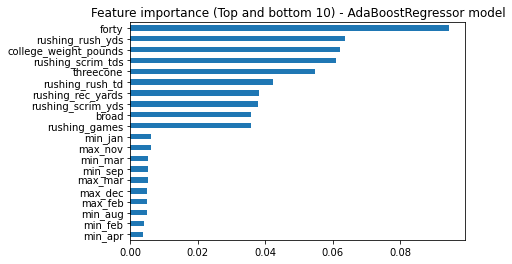

In [242]:
#Adaboost
adaboostregressor = AdaBoostRegressor(DecisionTreeRegressor(criterion='mse'), n_estimators=100, loss='linear', learning_rate=1, random_state=1)
adaboostregressor.fit(X_train, Y_train)
madden_predict = adaboostregressor.predict(X_validation)

print_results(Y_validation, madden_predict)
plot_feat_import(adaboostregressor.feature_importances_, 'AdaBoostRegressor')
mat = confusion_matrix(Y_validation, madden_predict)
print(mat)
#plot_confusion(mat, 'Adaboost')
result_df_viz(result_df, madden_predict, 'AdaBoost')
from scipy.stats import rankdata
print(result_df.columns[3:])
rank_df = result_df[result_df.columns[3:]]

def rank(row):
    print()
    return row.sum()/len(row)
result_df['rank'] = rank_df.apply(rank, axis=1)
ordered_df = result_df[['full_name', 'AdaBoost', prediction_feature, 'position_group_rank']].sort_values(by=['AdaBoost'], ascending=False)
ordered_df
#plot_confusion_matrix(adaboostregressor, X_validation, Y_validation)


In [ ]:
def f_adaboost_tune(n, loss, lr):

    adaboostregressor = AdaBoostRegressor(DecisionTreeRegressor(criterion='mse'), n_estimators=n, loss=loss, learning_rate=lr, random_state=1)
    adaboostregressor.fit(X_train, Y_train)
    madden_predict = adaboostregressor.predict(X_validation)
    print('loss: {}, n_estimators:  {}, learning rate:  {}'.format(loss, n, lr))
    print_results(Y_validation, madden_predict)
    print('------------------')



#this can be used to tune the model parameters if we want    
for estimators in [100,1000]:
    for loss in ['linear', 'square', 'exponential']:
        f_adaboost_tune(estimators, 'linear', 1)

In [ ]:
model = adaboostregressor
kfold = StratifiedKFold(n_splits=30, random_state=1, shuffle=True)
cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
print(cv_results)

Accuracy:  0.46153846153846156
R2 : -1.2382075471698113
MSE : 280.7692307692308


C:\Users\jonat\Anaconda3\envs\tf-gpu2.0\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


,full_name,madden_cat,position_group_rank,AdaBoost,Log_Regression
116,Jahwan Edwards,60,26.0,60.0,40
128,Mike Davis,70,11.0,60.0,40
126,Melvin Gordon,80,2.0,70.0,80
127,Michael Dyer,60,28.0,60.0,60
134,Trey Williams,60,31.0,70.0,60
117,Javorius Allen,70,10.0,70.0,70
111,Cameron Artis-Payne,70,16.0,70.0,70
129,T.J. Yeldon,80,3.0,80.0,70
125,Matt Jones,70,7.0,50.0,40
122,Kenny Hilliard,60,20.0,60.0,60


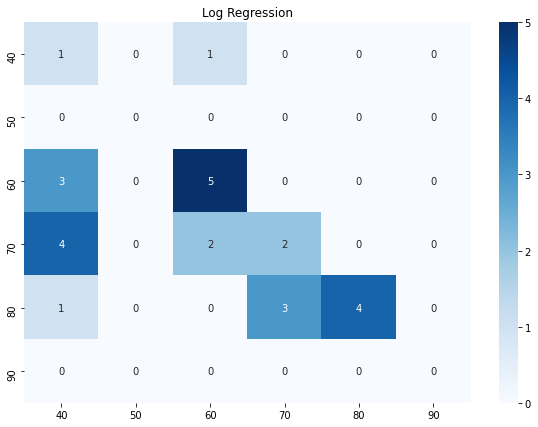

In [106]:
#Logistic Regression:
clf = LogisticRegression(random_state=1).fit(X_train, Y_train)
madden_predict = clf.predict(X_validation)
print_results(Y_validation, madden_predict)
mat = confusion_matrix(Y_validation, madden_predict, labels = class_names)
plot_confusion(mat, 'Log Regression')
result_df_viz(result_df, madden_predict, 'Log_Regression')


In [ ]:
#Lasso:
alpha = 0.1
lasso_model = Lasso(alpha=alpha).fit(X_train, Y_train)
madden_predict = lasso_model.predict(X_validation)

madden_predict = np.around(madden_predict, decimals = 0)
print_results(Y_validation, madden_predict)
plot_feat_import(lasso_model.coef_, 'Lasso')  
#plot_it()
print('----------')
result_df_viz(result_df, madden_predict, 'Lasso')

In [ ]:
#Lassocv:

lasso_modelcv = LassoCV(cv=5, random_state=0).fit(X_train, Y_train)
madden_predict = lasso_modelcv.predict(X_validation)
madden_predict = np.around(madden_predict, decimals = 0)
print_results(Y_validation, madden_predict)
print('LassoCV Model')
plot_feat_import(lasso_modelcv.coef_, 'Lassocv') 
print('----------')
result_df_viz(result_df, madden_predict, 'LassoCV')


In [ ]:
#RidgeCV:

ridge_model = RidgeCV(cv=5).fit(X_train, Y_train)
madden_predict = ridge_model.predict(X_validation)
madden_predict = np.around(madden_predict, decimals = 0)
print_results(Y_validation, madden_predict)

plot_feat_import(ridge_model.coef_, 'RidgeCV')
print('----------')
result_df_viz(result_df, madden_predict, 'RidgeCV')

In [ ]:
#ElasticNetCV:

elasticnetcv_model = ElasticNetCV(cv=5, random_state=0).fit(X_train, Y_train)
madden_predict = elasticnetcv_model.predict(X_validation)
madden_predict = np.around(madden_predict, decimals = 0)
print_results(Y_validation, madden_predict)
plot_feat_import(elasticnetcv_model.coef_, 'ElasticNetCV')
result_df_viz(result_df, madden_predict, 'ElasticNetCV')

Accuracy:  0.38461538461538464
R2 : -1.0235849056603774
MSE : 253.84615384615384
Decision Tree Regressor model picked 41 out of 45 features


,full_name,madden_cat,position_group_rank,AdaBoost,Log_Regression,Decision_Tree_Reg
116,Jahwan Edwards,60,26.0,60.0,40,60.0
128,Mike Davis,70,11.0,60.0,40,40.0
126,Melvin Gordon,80,2.0,70.0,80,70.0
127,Michael Dyer,60,28.0,60.0,60,60.0
134,Trey Williams,60,31.0,70.0,60,70.0
117,Javorius Allen,70,10.0,70.0,70,70.0
111,Cameron Artis-Payne,70,16.0,70.0,70,80.0
129,T.J. Yeldon,80,3.0,80.0,70,40.0
125,Matt Jones,70,7.0,50.0,40,70.0
122,Kenny Hilliard,60,20.0,60.0,60,40.0


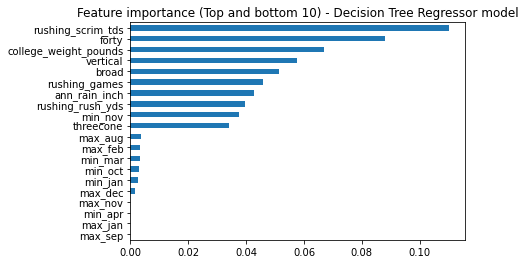

In [107]:
#Decision Tree Regressor
decisiontreeregrssor = DecisionTreeRegressor()
decisiontreeregrssor.fit(X_train, Y_train)
madden_predict = decisiontreeregrssor.predict(X_validation)
print_results(Y_validation, madden_predict)
plot_feat_import(decisiontreeregrssor.feature_importances_, 'Decision Tree Regressor')
result_df_viz(result_df, madden_predict, 'Decision_Tree_Reg')

Accuracy:  0.4230769230769231
R2 : -0.4716981132075473
MSE : 184.6153846153846
Decision Tree Classifier model picked 41 out of 45 features
[[2 0 0 0 0]
 [3 3 0 2 0]
 [0 5 2 0 1]
 [1 0 3 4 0]
 [0 0 0 0 0]]


,full_name,madden_cat,position_group_rank,AdaBoost,Log_Regression,Decision_Tree_Reg,Decision_Tree_Class
116,Jahwan Edwards,60,26.0,60.0,40,60.0,80
128,Mike Davis,70,11.0,60.0,40,40.0,60
126,Melvin Gordon,80,2.0,70.0,80,70.0,70
127,Michael Dyer,60,28.0,60.0,60,60.0,40
134,Trey Williams,60,31.0,70.0,60,70.0,80
117,Javorius Allen,70,10.0,70.0,70,70.0,70
111,Cameron Artis-Payne,70,16.0,70.0,70,80.0,60
129,T.J. Yeldon,80,3.0,80.0,70,40.0,80
125,Matt Jones,70,7.0,50.0,40,70.0,60
122,Kenny Hilliard,60,20.0,60.0,60,40.0,60


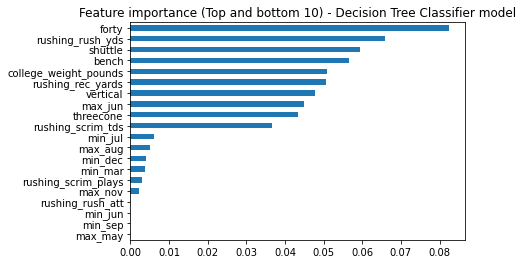

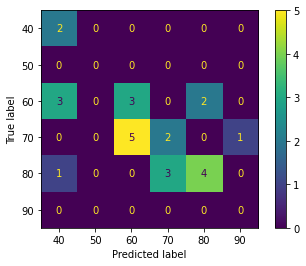

In [108]:
#Decision Tree
from sklearn import tree
decisiontree = DecisionTreeClassifier(max_depth = 100)
decisiontree.fit(X_train, Y_train)
madden_predict = decisiontree.predict(X_validation)
print('Accuracy:  ' + str(accuracy_score(Y_validation, madden_predict)))
print('R2 : ' + str(r2_score(Y_validation, madden_predict)))
print('MSE : ' + str(mean_squared_error(Y_validation, madden_predict)))
plot_feat_import(decisiontree.feature_importances_, 'Decision Tree Classifier')
print(confusion_matrix(Y_validation, madden_predict))
plot_confusion_matrix(decisiontree, X_validation, Y_validation, labels = class_names)
result_df_viz(result_df, madden_predict, 'Decision_Tree_Class')

Accuracy:  0.46153846153846156
R2 : -1.207547169811321
MSE : 276.9230769230769
Extra Tree Classifier model picked 45 out of 45 features
[[2 0 0 0]
 [5 3 0 0]
 [5 0 3 0]
 [0 1 3 4]]


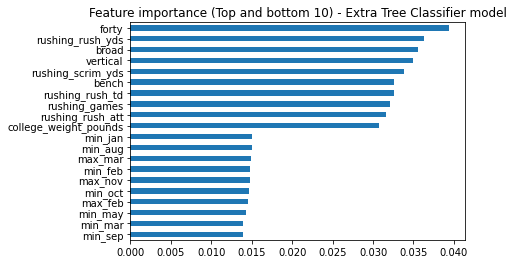

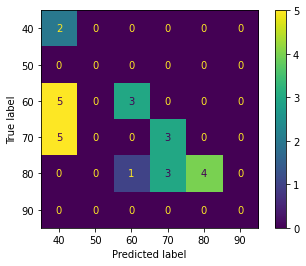

In [109]:
#Extra Tree


from sklearn import tree
extradecisiontree = ExtraTreesClassifier(max_depth = 300)
extradecisiontree.fit(X_train, Y_train)
madden_predict = extradecisiontree.predict(X_validation)
print('Accuracy:  ' + str(accuracy_score(Y_validation, madden_predict)))
print('R2 : ' + str(r2_score(Y_validation, madden_predict)))
print('MSE : ' + str(mean_squared_error(Y_validation, madden_predict)))
plot_feat_import(extradecisiontree.feature_importances_, 'Extra Tree Classifier')
result_df_viz(result_df, madden_predict, 'Extra_Tree')
print(confusion_matrix(Y_validation, madden_predict))
plot_confusion_matrix(extradecisiontree, X_validation, Y_validation, labels=class_names)

Accuracy:  0.4230769230769231
R2 : -0.5636792452830188
MSE : 196.15384615384616
AdaBoostClassifier model picked 39 out of 45 features


,full_name,madden_cat,position_group_rank,AdaBoost,Log_Regression,Decision_Tree_Reg,Decision_Tree_Class,Extra_Tree,AdaBoost_Class
116,Jahwan Edwards,60,26.0,60.0,40,60.0,80,60,80
128,Mike Davis,70,11.0,60.0,40,40.0,60,40,70
126,Melvin Gordon,80,2.0,70.0,80,70.0,70,70,70
127,Michael Dyer,60,28.0,60.0,60,60.0,40,40,40
134,Trey Williams,60,31.0,70.0,60,70.0,80,60,80
117,Javorius Allen,70,10.0,70.0,70,70.0,70,70,70
111,Cameron Artis-Payne,70,16.0,70.0,70,80.0,60,70,60
129,T.J. Yeldon,80,3.0,80.0,70,40.0,80,80,80
125,Matt Jones,70,7.0,50.0,40,70.0,60,40,60
122,Kenny Hilliard,60,20.0,60.0,60,40.0,60,60,60


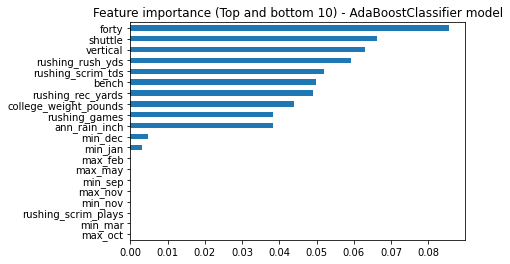

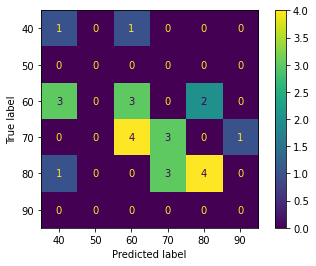

In [110]:
#Adaboost
adaboostclassifier = AdaBoostClassifier(DecisionTreeClassifier(), n_estimators=500)
adaboostclassifier.fit(X_train, Y_train)
madden_predict = adaboostclassifier.predict(X_validation)
print('Accuracy:  ' + str(accuracy_score(Y_validation, madden_predict)))
print('R2 : ' + str(r2_score(Y_validation, madden_predict)))
print('MSE : ' + str(mean_squared_error(Y_validation, madden_predict)))
plot_feat_import(adaboostclassifier.feature_importances_, 'AdaBoostClassifier')

plot_confusion_matrix(adaboostclassifier, X_validation, Y_validation, labels = class_names)
result_df_viz(result_df, madden_predict, 'AdaBoost_Class')


Accuracy:  0.19230769230769232
R2 : -2.556603773584906
MSE : 446.15384615384613


,full_name,madden_cat,position_group_rank,AdaBoost,Log_Regression,Decision_Tree_Reg,Decision_Tree_Class,Extra_Tree,AdaBoost_Class,SVM
116,Jahwan Edwards,60,26.0,60.0,40,60.0,80,60,80,40
128,Mike Davis,70,11.0,60.0,40,40.0,60,40,70,40
126,Melvin Gordon,80,2.0,70.0,80,70.0,70,70,70,70
127,Michael Dyer,60,28.0,60.0,60,60.0,40,40,40,40
134,Trey Williams,60,31.0,70.0,60,70.0,80,60,80,40
117,Javorius Allen,70,10.0,70.0,70,70.0,70,70,70,70
111,Cameron Artis-Payne,70,16.0,70.0,70,80.0,60,70,60,40
129,T.J. Yeldon,80,3.0,80.0,70,40.0,80,80,80,80
125,Matt Jones,70,7.0,50.0,40,70.0,60,40,60,40
122,Kenny Hilliard,60,20.0,60.0,60,40.0,60,60,60,40


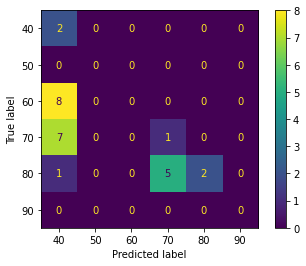

In [111]:
#SVM
svmclassifier = SVC(gamma='auto')
svmclassifier.fit(X_train, Y_train)
madden_predict = svmclassifier.predict(X_validation)
print('Accuracy:  ' + str(accuracy_score(Y_validation, madden_predict)))
print('R2 : ' + str(r2_score(Y_validation, madden_predict)))
print('MSE : ' + str(mean_squared_error(Y_validation, madden_predict)))
#plot_feat_import(svmclassifier.feature_importances_, 'SVC')
plot_confusion_matrix(svmclassifier, X_validation, Y_validation, labels = class_names)
result_df_viz(result_df, madden_predict, 'SVM')

Accuracy:  0.3076923076923077
R2 : -1.9433962264150946
MSE : 369.2307692307692
Random Forest model picked 45 out of 45 features


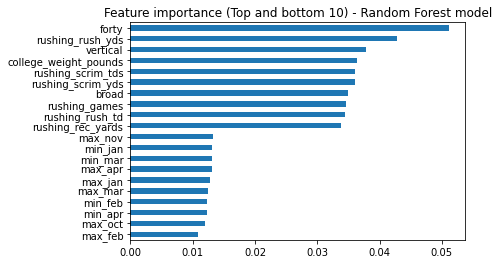

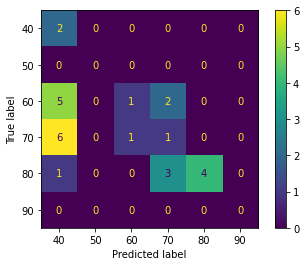

In [112]:
#RandomForest
rfclassifier = RandomForestClassifier()
rfclassifier.fit(X_train, Y_train)
madden_predict = rfclassifier.predict(X_validation)
print('Accuracy:  ' + str(accuracy_score(Y_validation, madden_predict)))
print('R2 : ' + str(r2_score(Y_validation, madden_predict)))
print('MSE : ' + str(mean_squared_error(Y_validation, madden_predict)))
plot_feat_import(rfclassifier.feature_importances_, 'Random Forest')
result_df_viz(result_df, madden_predict, 'RF_Class')
plot_confusion_matrix(rfclassifier, X_validation, Y_validation, labels = class_names)

In [113]:
#PCA with Linear Regression
pca = PCA(n_components=5)
pca_x = pca.fit_transform(X_train)
pca_validation = pca.transform(X_validation)

log_pca = LogisticRegression(random_state=0).fit(pca_x, Y_train)
madden_predict = log_pca.predict(pca_validation)
print('Accuracy:  ' + str(accuracy_score(Y_validation, madden_predict)))
print('R2 : ' + str(r2_score(Y_validation, madden_predict)))
print('MSE : ' + str(mean_squared_error(Y_validation, madden_predict)))
#print(log_pca.coef_.shape)
#plot_feat_import(log_pca.coef_, 'PCA with Log Regression')
result_df_viz(result_df, madden_predict, 'Log_PCA')

Accuracy:  0.11538461538461539
R2 : -3.9976415094339623
MSE : 626.9230769230769


,full_name,madden_cat,position_group_rank,AdaBoost,Log_Regression,Decision_Tree_Reg,Decision_Tree_Class,Extra_Tree,AdaBoost_Class,SVM,RF_Class,Log_PCA
116,Jahwan Edwards,60,26.0,60.0,40,60.0,80,60,80,40,60,40
128,Mike Davis,70,11.0,60.0,40,40.0,60,40,70,40,40,40
126,Melvin Gordon,80,2.0,70.0,80,70.0,70,70,70,70,70,70
127,Michael Dyer,60,28.0,60.0,60,60.0,40,40,40,40,40,40
134,Trey Williams,60,31.0,70.0,60,70.0,80,60,80,40,70,40
117,Javorius Allen,70,10.0,70.0,70,70.0,70,70,70,70,70,70
111,Cameron Artis-Payne,70,16.0,70.0,70,80.0,60,70,60,40,60,40
129,T.J. Yeldon,80,3.0,80.0,70,40.0,80,80,80,80,80,40
125,Matt Jones,70,7.0,50.0,40,70.0,60,40,60,40,40,40
122,Kenny Hilliard,60,20.0,60.0,60,40.0,60,60,60,40,40,40


Accuracy:  0.0
R2 : -0.05839622641509434
MSE : 132.76923076923077
Gradient Booster Regressor model picked 45 out of 45 features


,full_name,madden_cat,position_group_rank,AdaBoost,Log_Regression,Decision_Tree_Reg,Decision_Tree_Class,Extra_Tree,AdaBoost_Class,SVM,RF_Class,Log_PCA,GB_Regressor
116,Jahwan Edwards,60,26.0,60.0,40,60.0,80,60,80,40,60,40,71.0
128,Mike Davis,70,11.0,60.0,40,40.0,60,40,70,40,40,40,61.0
126,Melvin Gordon,80,2.0,70.0,80,70.0,70,70,70,70,70,70,67.0
127,Michael Dyer,60,28.0,60.0,60,60.0,40,40,40,40,40,40,58.0
134,Trey Williams,60,31.0,70.0,60,70.0,80,60,80,40,70,40,59.0
117,Javorius Allen,70,10.0,70.0,70,70.0,70,70,70,70,70,70,67.0
111,Cameron Artis-Payne,70,16.0,70.0,70,80.0,60,70,60,40,60,40,64.0
129,T.J. Yeldon,80,3.0,80.0,70,40.0,80,80,80,80,80,40,69.0
125,Matt Jones,70,7.0,50.0,40,70.0,60,40,60,40,40,40,55.0
122,Kenny Hilliard,60,20.0,60.0,60,40.0,60,60,60,40,40,40,53.0


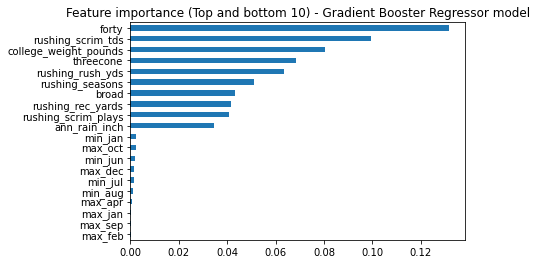

In [114]:
#Gradient Booster Regressor
import numpy as np
gradientboostingregressor = GradientBoostingRegressor(random_state=0)
gradientboostingregressor.fit(X_train, Y_train)
madden_predict = gradientboostingregressor.predict(X_validation)
madden_predict = np.around(madden_predict, decimals = 0)
print('Accuracy:  ' + str(accuracy_score(Y_validation, madden_predict)))
print('R2 : ' + str(r2_score(Y_validation, madden_predict)))
print('MSE : ' + str(mean_squared_error(Y_validation, madden_predict)))
plot_feat_import(gradientboostingregressor.feature_importances_, 'Gradient Booster Regressor')
result_df_viz(result_df, madden_predict, 'GB_Regressor')

In [ ]:

#for col in rank_df.columns:
#    rank_df[col] = rankdata(rank_df[col].values)

In [ ]:
#def rank(row):
#    print()
#    return row.sum()/len(row)
#result_df['rank'] = rankdata(rank_df.apply(rank, axis=1))

f

In [ ]:
ordered_df.to_csv('rank_of_picks.csv')

eclf = VotingClassifier(estimators=[('svc', svmclassifier), ('extratrees', extradecisiontree), ('rf', rfclassifier), ('logpca', log_pca)],voting='hard')


for clf, label in zip([svmclassifier, extradecisiontree, rfclassifier, log_pca, eclf], ['SVC', 'Extra Trees', 'Random Forest', 'Log_pca', 'Ensemble']): 
    scores = cross_val_score(clf, value_data, label_data, scoring='accuracy', cv=5)
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))
    
#



In [ ]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
#models.append(('LASSO', Lasso(alpha=0.1)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('ABC', AdaBoostClassifier()))
models.append(('GBC', GradientBoostingClassifier(n_estimators=200)))
models.append(('RFC', RandomForestClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('ETC', ExtraTreesClassifier()))

# evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, value_data, label_data, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))


In [ ]:
# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

In [ ]:
# histograms for some interesting measurements
X_train.hist()
pyplot.show()

In [ ]:
def z_score_rescale(data_mean, data_std, z_score):
    X = (z_score* data_std) + data_mean
    X =  np.around(X, decimals = 0)
    X = int(X)
    return X


def f_rs(val):
    if val >= 90 : val = 90
    elif val < 90 and val >= 80 : val = 80
    elif val < 80 and val >= 70 : val = 70  
    elif val < 70 and val >= 60 : val = 60
    elif val < 60 and val >= 50 : val = 50
    elif val < 50 and val >= 40 : val = 40
    else: val = 40
    return val

#Adaboost
adaboostregressor = AdaBoostRegressor(DecisionTreeRegressor(criterion='mse'), n_estimators=100, loss='linear', learning_rate=1, random_state=1)
adaboostregressor.fit(X_train, Y_train)
madden_predict = adaboostregressor.predict(X_validation)
results_test = []
for x in madden_predict:
    temp = z_score_rescale(max_mean, max_std, x)
    temp = f_rs(temp)
    results_test.append(temp)
madden_predict = np.array(results_test)

true_test = []
for x in Y_validation:
    temp = z_score_rescale(max_mean, max_std, x)
    temp = f_rs(temp)
    true_test.append(temp)
Y_validation2 = np.array(true_test)

print(madden_predict)

print_results(Y_validation2, madden_predict)
plot_feat_import(adaboostregressor.feature_importances_, 'AdaBoostRegressor')
mat = confusion_matrix(Y_validation2, madden_predict, labels = class_names)
print(mat)
plot_confusion(mat, 'Adaboost')
result_df_viz(result_df, madden_predict, 'AdaBoost')

#madden_predict.apply((z_score_rescale(max_mean, max_std, x)))
    